# Portfolio analysis and rebalancing tool
*by Magdalena Gawron*

In [1]:
# Imports
import pandas as pd
from Portfolio import Portfolio

pd.options.display.float_format = "{:,.1f}".format

# Portfolio initiation

Use this module to:

1. Define your investing strategy (target asset allocation)
2. Provide your initial asset alocation information
3. Upload your Interactive Brokers MTM report 

In [2]:
# Create class portfolio

# That is the reference currency of your portfolio
currency = "PLN"  # @param

# Initiate the class Portfolio
portfolio = Portfolio(currency)

# Provide link / file name of your target asset allocations
target_all_file = r'Inputs/Upload_target_allocations.csv'
portfolio.upload_target_allocations(file_input=target_all_file)

# Example of a manual data upload (line by line)
# portfolio.add_asset(category="Cash", subcategory="Electronic", ticker=None,
#                 name="Pekao SA", currency="PLN", amount=243000,
#                 unit_value=1)

asset_all_file = r'Inputs/Upload_asset_allocations.csv'
portfolio.upload_asset_allocations(file_input=asset_all_file)

In [3]:
# Load your IB portfolio report

# If you have added some non-US stocks to your IB portfolio, please look up their tickers at:
# https://finance.yahoo.com

cash_category = "Cash"
cash_subcategory = "Electronic"
IB_file = r'Inputs/mtm_mock.csv'

mapping_file = "https://github.com/maggawron/portfolio-rebalancing/raw/main/Inputs/IB_stock_mapping.csv"
portfolio.upload_IB_file(file_input=IB_file, mapping_input=mapping_file,
                         cash_category=cash_category, cash_subcategory=cash_subcategory)

## Validate portfolio
Just validate if all the assets are assigned to correct categories and if all prices look correct.

In [5]:
# Here is your investing strategy
portfolio.target_allocations

,Category,Subcategory,Target_Allocation,Tolerance_pp
0,Stocks,"Diversified, world-wide",55.5,0.5
1,Stocks,Value,5.0,1.0
2,Stocks,3a,5.0,1.0
3,Stocks,"Regions of interest (europe, poland)",5.0,2.0
4,Stocks,Real estate,5.0,3.0
5,Bonds,Bonds,5.0,1.0
6,Gold,Gold,6.8,1.6
7,Cryptocurrency,Cryptocurrency,4.5,3.0
8,Cash,Random accounts,1.0,2.0
9,Cash,Electronic,4.2,2.0


In [6]:
# Here is your portfolio
portfolio.assets_list

,Category,Subcategory,Ticker,Name,Currency,Quantity,Unit_Value,Value in original currency,Value in PLN,Source,Divisible,Rebalancable,Predefined_share
0,Cash,Electronic,NaN,Bank 5 PLN,PLN,0,1.0,0.0,0.0,Excel upload,False,True,nan
1,Cash,Electronic,NaN,Bank 6 USD,USD,0,1.0,0.0,0.0,Excel upload,False,True,nan
2,Cash,Electronic,NaN,Bank 4 PLN,PLN,0,1.0,0.0,0.0,Excel upload,False,True,nan
3,Cash,Electronic,NaN,Bank 1,PLN,282,1.0,282.0,282.0,Excel upload,False,True,nan
4,Stocks,Value,NaN,Broker 1,PLN,1,"9,834.0","9,834.0","9,834.0",Excel upload,False,True,40.0
5,Stocks,"Diversified, world-wide",NaN,Broker 2,PLN,1,"5,502.0","5,502.0","5,502.0",Excel upload,False,False,nan
6,Cash,"Debts, deposits etc.",NaN,Debt 1,PLN,1,"43,587.0","43,587.0","43,587.0",Excel upload,False,False,nan
7,Stocks,Value,NaN,Broker 8,PLN,1820,1.0,"1,820.0","1,820.0",Excel upload,False,True,40.0
8,Stocks,Value,NaN,Cash PLN,PLN,2873,1.0,"2,873.0","2,873.0",Excel upload,False,True,20.0
9,Cash,Physical,NaN,Cash USD 1,USD,727,1.0,727.0,"2,695.6",Excel upload,False,False,nan


## Rebalance your portfolio
There are three styles of rebalancing within category to choose:

1.   **proportional** - assets within same category are rebalanced proportionally to their current allocations *(default option)*
2.   **predefined** - assets within same category & subcategory are rebalanced based on shares predefined by user in assets_list. *Note that rule will only be executed for categories & subcategories with sum of all rebalancable assets equal 100 with no missing values in column "Predefined_share"*


 212346 PLN is available to sell vs. 304912 PLN to buy. Buying for 69.6% of original budget


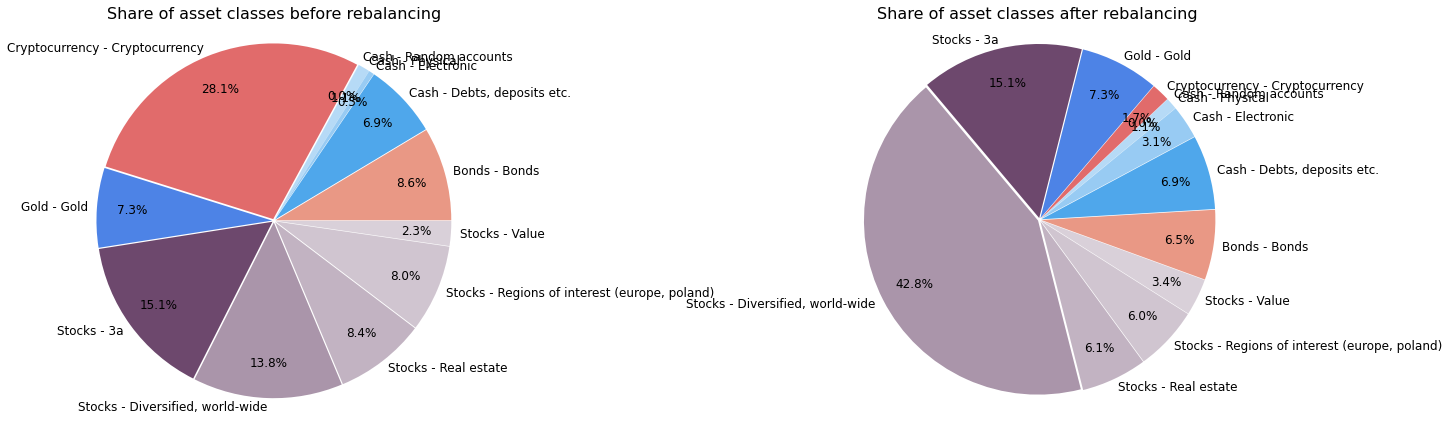

,Category,Subcategory,Asset,Action,Buy / Sell quantity,Value delta in PLN,Start value in PLN,End value in PLN
0,Stocks,"Diversified, world-wide",VANGUARD TOT WORLD STK ETF,Buy,835.0,"79,583.8","35,339.3","114,923.2"
1,Stocks,"Diversified, world-wide",VANGUARD VALUE ETF,Buy,835.0,"104,233.1","46,284.8","150,517.9"
2,Stocks,Value,Broker 8,Buy,"4,766.0","4,766.0","1,820.0","6,586.0"
3,Stocks,Value,Cash PLN,Buy,"2,383.0","2,383.0","2,873.0","5,256.0"
4,Stocks,"Regions of interest (europe, poland)",ISHARES MSCI POLAND ETF,Sell,100.0,"1,876.5","6,957.7","5,081.2"
5,Stocks,"Regions of interest (europe, poland)",UBS ETF SXI REAL ESTATE,Sell,100.0,"3,480.0","14,278.7","10,798.7"
6,Stocks,"Regions of interest (europe, poland)",VANGUARD TOTAL WORLD BOND ET,Sell,97.0,"7,738.7","29,581.1","21,842.4"
7,Stocks,Real estate,ISHARES GOLD TRUST,Sell,100.0,"1,640.0","6,080.8","4,440.8"
8,Stocks,Real estate,VANGUARD GLBL EX-US REAL EST,Sell,100.0,"5,483.0","20,330.0","14,847.0"
9,Stocks,Real estate,ISHARS RES AND MULTI REALES,Sell,100.0,"7,135.4","26,456.9","19,321.5"


In [4]:
# Category and subcategfory to allocate any value left after rebalancing
# due to lacking divisbility of certain assets
leftover_cat = "Cryptocurrency"
leftover_subcat = "Cryptocurrency"

# That is a min value in your default currency from which
# any rebalancing recommendation will be made
min_delta = 0
reb_style = "predefined"

portfolio.rebalance(rebalancing_style=reb_style, leftover_cat=leftover_cat,
                    leftover_subcat=leftover_subcat, min_delta=min_delta)